In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root_file_path = "/home/ema/Documents/GitHub/Subbarrier_Heavy-Ion_Fusion/Data/giorno_3/coincidenza_silicio_MCP_16.00/vuoto_3_peaks_72/RAW/SDataR_vuoto_3_peaks_72.root"
root_file = uproot.open(root_file_path)

# Convert the tree into a pandas DataFrame
df = root_file["Data_R;1"].arrays(library="pd")

print(df)

       Channel        Timestamp  Board  Energy  Flags
0            0      71026696000      0    1221      0
1            0     108364388000      0    1272      0
2            1     175836144000      0    9989      0
3            1     193261820000      0    9748      0
4            1     194253080000      0    9466      0
...        ...              ...    ...     ...    ...
20719        0  985299655692000      0    1300      0
20720        1  985299659576000      0    8833      0
20721        0  985319047568000      0    1253      0
20722        1  985319051452000      0    9700      0
20723        0  985428585100000      0    1264      0

[20724 rows x 5 columns]


In [7]:
#Channel0 == Si detector
#Channel1 == MCP
window = 4.e-6 #seconds
Energies_ch0 = df[df['Channel'] == 0]['Energy'].values
Energies_ch1 = df[df['Channel'] == 1]['Energy'].values

Timestamp_ch0 = df[df['Channel'] == 0]['Timestamp'].values * 1.e-12
Timestamp_ch1 = df[df['Channel'] == 1]['Timestamp'].values * 1.e-12

last_index = 0
x = []
y = []
for i, time in enumerate(Timestamp_ch1):
    #search sorted returns the idex of the first element that is >= value   
    j = last_index + np.searchsorted(Timestamp_ch0[last_index:], time)-1
    delta_t = time - Timestamp_ch0[j] 
    if(0 < delta_t < window):
      x.append(Energies_ch0[j])
      y.append(Energies_ch1[i])
      last_index = j

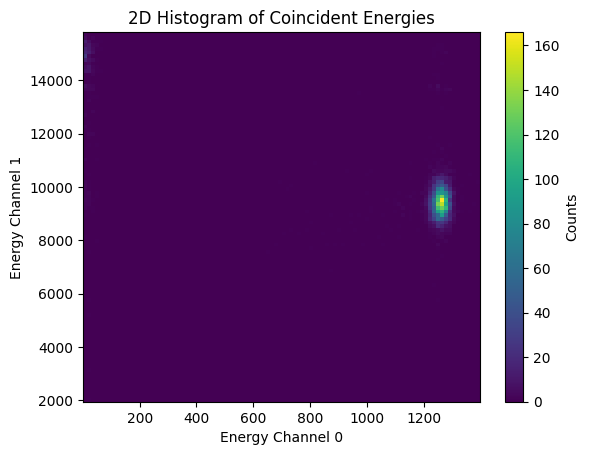

In [8]:
x, y = np.array(x), np.array(y)
x, y = x[x>0], y[x>0]

plt.hist2d(x, y, bins = 100, cmap='viridis')
plt.colorbar(label='Counts')  
plt.xlabel('Energy Channel 0')
plt.ylabel('Energy Channel 1')
plt.title('2D Histogram of Coincident Energies')
plt.show()